In [63]:
import numpy as np
from numpy import sin, pi
import matplotlib.pyplot as plt 
#from scipy.linalg import toeplitz


In [64]:
def g(x):
    return sin(pi*x)

def montaMatriz(n,M,diagonalPrincipal,diagonalAdj):
    for i in range(n):
        for j in range(n):
            if i == j:
                M[i][j] = diagonalPrincipal
            elif (j == i+1) or (j == i-1): 
                M[i][j] = diagonalAdj
    return M

def solucaoexata(x,t):
    return np.exp((-pi**2)*t) * np.sin(pi*x)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ] 0.05


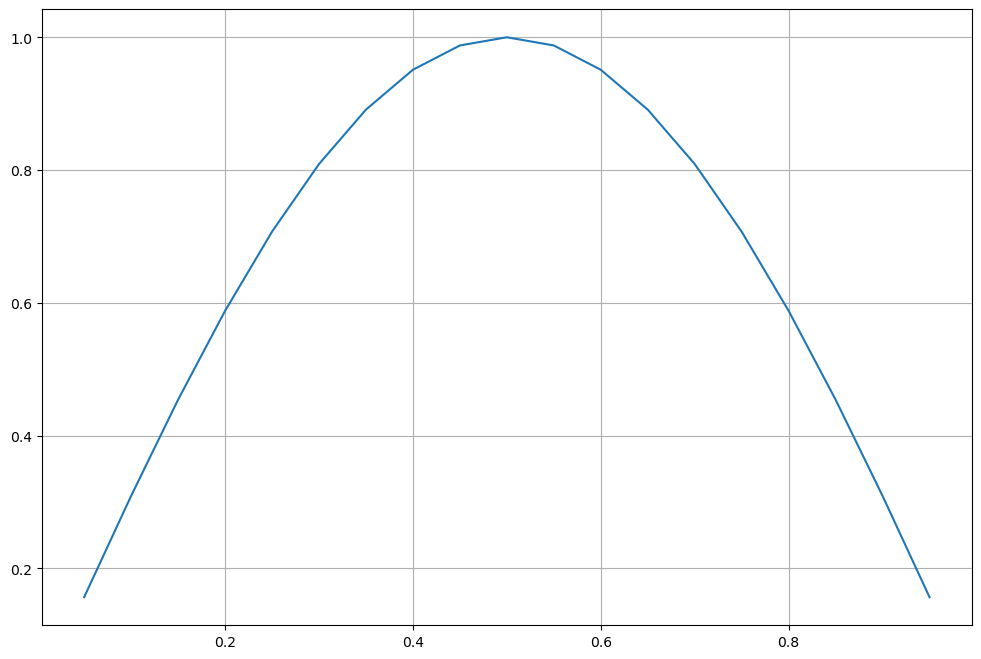

In [65]:
c = 1 # coeficiente de difusão
n = 20 # número de divisões da barra
L = 1.0 # comprimento da barra
h = L/n # tamanho do passo no espaço , posso escolher qualquer valor para h agora
dt = 0.001 # tamanho do passo no tempo
t_final = 0.1
cond = c*dt/h**2 # condição de estabilidade, lambda da matriz tridiagonal
# print(cond)
#condições de contorno (cada extremidade da barra)
T_left = 0.0
T_right = 0.0


diagonalPrincipal = 1+2*cond #diagonal principal da matriz tridiagonal 
diagonaisAdj = -cond #diagonais adjacentes da matriz tridiagonal
matriz = np.zeros((n-1,n-1))


#matriz constante no tempo
matriz = montaMatriz(n-1,matriz,diagonalPrincipal,diagonaisAdj)



# for i in range(n-1):
#     for j in range(n-1):
#         print(matriz[i][j], end=' ')
#     print(' ')



tempo = np.arange(0, t_final, dt) #espaçamento fisico de t = 0.01, arange para um vetor em um intervalo de de 0 a t_final com passo t
x = np.linspace(0, L, n+1) # quantidade n de pontos no espaço, linspace para um vetor num intervalo com n pontos
print(x,h)
T = np.zeros(n-1) 

T = g(x[1:-1])  #condição inicial, no miolo do vetor  
T_new = np.zeros(len(T))

b = np.zeros(n-1)  #vetor do lado direito da equação matricial Ax = b

x_plot = x[1:-1]


plt.figure(figsize=(12,8))
plt.plot(x_plot,T)
plt.grid(True)
plt.show() 



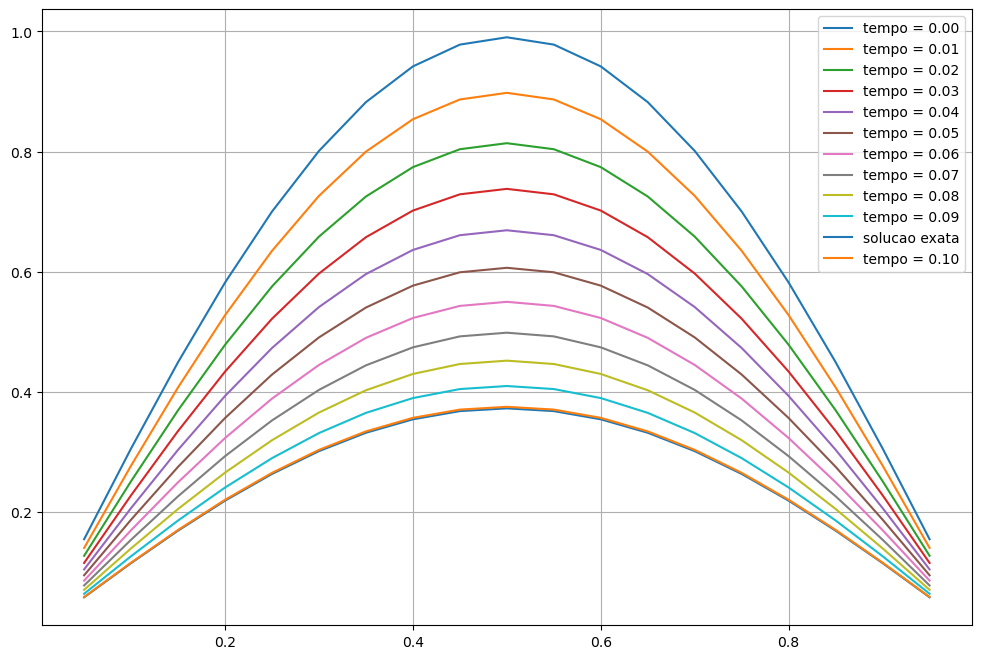

In [66]:
plt.figure(figsize=(12,8))


for i in range(len(tempo)):
    b[:]= T[:]
    
    T_new[:] = np.linalg.solve(matriz, b)
    
    
    # T_new[0]  = T_left     #condições de contorno
    # T_new[-1] = T_right


    T[:] = T_new.copy()
    if(i%10 == 0):
        plt.plot(x_plot,T_new,label = f'tempo = {tempo[i]:.2f}')
    
# T_new = np.insert(T_new, 0, T_left)
# T_new = np.append(T_new, T_right)


plt.plot(x_plot,solucaoexata(x_plot,t_final), label ='solucao exata') 
plt.plot(x_plot, T_new,label = f'tempo = {t_final:.2f}')
plt.legend()
plt.grid(True) 
plt.show()

<>:84: SyntaxWarning: invalid escape sequence '\m'
<>:84: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_150924/2368272150.py:84: SyntaxWarning: invalid escape sequence '\m'
  label=f'Referência $\mathcal{{O}}(h^{{{p_ref:.1f}}})$') # Use LaTeX for the exponent


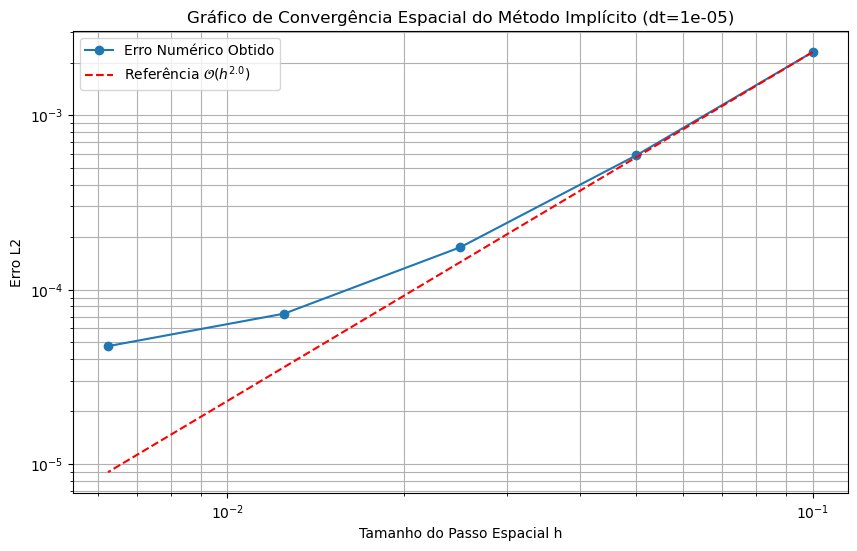

In [70]:
def run_solver_implicit(n_divisions, dt, t_final, c, L):
    """
    Executa a simulação implícita para um dado número de divisões (n).
    """
    size_internal = n_divisions - 1
    h = L / n_divisions
    cond = c * dt / h**2
    
    T_left = 0.0
    T_right = 0.0

    # Montagem da Matriz A
    diagonalPrincipal = 1 + 2 * cond 
    diagonaisAdj = -cond 
    matriz = np.zeros((size_internal, size_internal))
    matriz = montaMatriz(size_internal, matriz, diagonalPrincipal, diagonaisAdj)
    
    # Vetores de posição
    x_full = np.linspace(0, L, n_divisions + 1)
    x_plot = x_full[1:-1] # Pontos internos
    
    # Inicialização
    T = g(x_plot)  # CI
    b = np.zeros(size_internal) 
    
    tempo = np.arange(0, t_final, dt)
    
    # Loop Temporal
    for _ in range(1, len(tempo)):
        b[:] = T[:] # b = T^n (Método Implícito Básico)
        
        # Adicionar Contribuições das BCs (T_left=T_right=0)
        b[0] += cond * T_left
        b[-1] += cond * T_right
        
        # Solução e Atualização
        T_new = np.linalg.solve(matriz, b)
        T[:] = T_new[:]
        
    return T, x_plot # Retorna a solução final e o grid interno

# --- 2. Parâmetros de Análise e Configuração ---

c_val = 1.0
L_val = 1.0
t_final_val = 0.1

# PASSO TEMPORAL CRÍTICO: Fixado muito baixo para isolar o erro espacial
# Garantimos que o erro temporal não mascare o erro O(h^2)
dt_val = 0.00001 

# Diferentes resoluções espaciais para medir a convergência
Ns = [10, 20, 40, 80, 160] 
erros = []
hs = [] 

# --- 3. Loop Principal de Convergência ---

for n_val in Ns:
    # 1. Resolver o Problema Numérico
    T_num, x_num = run_solver_implicit(n_val, dt_val, t_final_val, c_val, L_val)
    
    # 2. Calcular a Solução Exata (Referência)
    T_exact = solucaoexata(x_num, t_final_val)
    
    # 3. Calcular o Erro (Norma L2 média)
    # Erro é a norma do vetor diferença dividido pela raiz do número de pontos.
    erro = np.linalg.norm(T_num - T_exact) / np.sqrt(n_val - 1) 
    erros.append(erro)
    
    # 4. Registrar o Passo Espacial h = L/n
    h = L_val / n_val
    hs.append(h)

# --- 4. Geração do Gráfico de Convergência (Log-Log) ---

plt.figure(figsize=(10, 6))
plt.loglog(hs, erros, 'o-', label='Erro Numérico Obtido')

# Adicionar Linha de Referência de Ordem 2 (p=2)
p_ref = 2.0
# Traça a linha reta de inclinação -2, ajustada para passar pelo primeiro ponto de dados
plt.loglog(hs, erros[0] * (np.array(hs)/hs[0])**p_ref, 'r--', 
           label=f'Referência $\mathcal{{O}}(h^{{{p_ref:.1f}}})$') # Use LaTeX for the exponent

plt.title(f"Gráfico de Convergência Espacial do Método Implícito (dt={dt_val})")
plt.xlabel("Tamanho do Passo Espacial h")
plt.ylabel("Erro L2")
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()